# Imports

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Import Dataset

## Read data

In [2]:
data=pd.read_csv("drinkMenu.csv")

## Explore data

In [3]:
data.head()

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75


In [4]:
data.tail()

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
237,Frappuccino® Blended Crème,Strawberries & Crème (Without Whipped Cream),Soymilk,320,3 2,0.4,0.0,0,250,67,1,64,5.0,6%,8%,20%,10%,0
238,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Tall Nonfat Milk,170,0.1,0.1,0.0,0,160,39,0,38,4.0,6%,0%,10%,0%,0
239,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Whole Milk,200,3.5,2.0,0.1,10,160,39,0,38,3.0,6%,0%,10%,0%,0
240,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Soymilk,180,1.5,0.2,0.0,0,160,37,1,35,3.0,4%,0%,10%,6%,0
241,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Grande Nonfat Milk,240,0.1,0.1,0.0,5,230,56,0,55,5.0,8%,0%,15%,0%,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Beverage_category          242 non-null    object 
 1   Beverage                   242 non-null    object 
 2   Beverage_prep              242 non-null    object 
 3   Calories                   242 non-null    int64  
 4    Total Fat (g)             242 non-null    object 
 5   Trans Fat (g)              242 non-null    float64
 6   Saturated Fat (g)          242 non-null    float64
 7    Sodium (mg)               242 non-null    int64  
 8    Total Carbohydrates (g)   242 non-null    int64  
 9   Cholesterol (mg)           242 non-null    int64  
 10   Dietary Fibre (g)         242 non-null    int64  
 11   Sugars (g)                242 non-null    int64  
 12   Protein (g)               242 non-null    float64
 13  Vitamin A (% DV)           242 non-null    object 

# Data Preparation

## Handling duplicates

In [6]:
data.duplicated().sum()

0

### There is no duplication in the data

## Handling Null Values


In [7]:
data.isna().any()

Beverage_category            False
Beverage                     False
Beverage_prep                False
Calories                     False
 Total Fat (g)               False
Trans Fat (g)                False
Saturated Fat (g)            False
 Sodium (mg)                 False
 Total Carbohydrates (g)     False
Cholesterol (mg)             False
 Dietary Fibre (g)           False
 Sugars (g)                  False
 Protein (g)                 False
Vitamin A (% DV)             False
Vitamin C (% DV)             False
 Calcium (% DV)              False
Iron (% DV)                  False
Caffeine (mg)                 True
dtype: bool

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Beverage_category          242 non-null    object 
 1   Beverage                   242 non-null    object 
 2   Beverage_prep              242 non-null    object 
 3   Calories                   242 non-null    int64  
 4    Total Fat (g)             242 non-null    object 
 5   Trans Fat (g)              242 non-null    float64
 6   Saturated Fat (g)          242 non-null    float64
 7    Sodium (mg)               242 non-null    int64  
 8    Total Carbohydrates (g)   242 non-null    int64  
 9   Cholesterol (mg)           242 non-null    int64  
 10   Dietary Fibre (g)         242 non-null    int64  
 11   Sugars (g)                242 non-null    int64  
 12   Protein (g)               242 non-null    float64
 13  Vitamin A (% DV)           242 non-null    object 

### There is only one Null Value in Caffeine column

In [9]:
data['Caffeine (mg)'].unique()

array(['175', '260', '330', '410', '75', '150', '85', '95', '180', '225',
       '300', '10', '20', '25', '30', '0', 'Varies', '50', '70', '120',
       '55', '80', '110', 'varies', '165', '235', '90', nan, '125', '170',
       '15', '130', '140', '100', '145', '65', '105'], dtype=object)

### First:We will replace varies with null value

In [10]:
data['Caffeine (mg)']=data['Caffeine (mg)'].replace("varies",np.NAN).replace("Varies",np.NAN)

In [11]:
data['Caffeine (mg)'].unique()

array(['175', '260', '330', '410', '75', '150', '85', '95', '180', '225',
       '300', '10', '20', '25', '30', '0', nan, '50', '70', '120', '55',
       '80', '110', '165', '235', '90', '125', '170', '15', '130', '140',
       '100', '145', '65', '105'], dtype=object)

In [12]:
data['Caffeine (mg)'].isna().sum()

23

### Now there is 23 null values in Caffeine column
### We can now replace them with mean of the column

In [13]:
data['Caffeine (mg)']=data['Caffeine (mg)'].astype(float)#we used float instead of integer(int) because null value(NAN) is of float type

data['Caffeine (mg)'].fillna(value=data['Caffeine (mg)'].mean() ,inplace=True)

In [14]:
data['Caffeine (mg)'].unique()

array([175.        , 260.        , 330.        , 410.        ,
        75.        , 150.        ,  85.        ,  95.        ,
       180.        , 225.        , 300.        ,  10.        ,
        20.        ,  25.        ,  30.        ,   0.        ,
        89.52054795,  50.        ,  70.        , 120.        ,
        55.        ,  80.        , 110.        , 165.        ,
       235.        ,  90.        , 125.        , 170.        ,
        15.        , 130.        , 140.        , 100.        ,
       145.        ,  65.        , 105.        ])

## drop unnecessary columns

In [15]:
data.columns

Index(['Beverage_category', 'Beverage', 'Beverage_prep', 'Calories',
       ' Total Fat (g)', 'Trans Fat (g) ', 'Saturated Fat (g)', ' Sodium (mg)',
       ' Total Carbohydrates (g) ', 'Cholesterol (mg)', ' Dietary Fibre (g)',
       ' Sugars (g)', ' Protein (g) ', 'Vitamin A (% DV) ', 'Vitamin C (% DV)',
       ' Calcium (% DV) ', 'Iron (% DV) ', 'Caffeine (mg)'],
      dtype='object')

In [16]:
data.drop([' Sodium (mg)','Vitamin A (% DV) ', 'Vitamin C (% DV)',
       ' Calcium (% DV) ', 'Iron (% DV) ', 'Trans Fat (g) ', 'Saturated Fat (g)', 'Cholesterol (mg)', ' Dietary Fibre (g)',' Protein (g) ']
          ,axis=1,inplace=True);

In [17]:
data

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Total Carbohydrates (g),Sugars (g),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,5,0,175.0
1,Coffee,Brewed Coffee,Tall,4,0.1,10,0,260.0
2,Coffee,Brewed Coffee,Grande,5,0.1,10,0,330.0
3,Coffee,Brewed Coffee,Venti,5,0.1,10,0,410.0
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,75,9,75.0
...,...,...,...,...,...,...,...,...
237,Frappuccino® Blended Crème,Strawberries & Crème (Without Whipped Cream),Soymilk,320,3 2,250,64,0.0
238,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Tall Nonfat Milk,170,0.1,160,38,0.0
239,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Whole Milk,200,3.5,160,38,0.0
240,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Soymilk,180,1.5,160,35,0.0


## check for duplication again

In [18]:
data.duplicated().sum()

0

# Encode Categorical values

In [19]:
data.columns

Index(['Beverage_category', 'Beverage', 'Beverage_prep', 'Calories',
       ' Total Fat (g)', ' Total Carbohydrates (g) ', ' Sugars (g)',
       'Caffeine (mg)'],
      dtype='object')

In [20]:
data.columns=['Beverage_category', 'Beverage', 'Beverage_prep', 'Calories',
       'TotalFat', 'TotalCarbohydrates', 'Sugars',
       'Caffeine']

In [21]:
# put a copy of original data in a variable first
data_orig=data.copy()

In [22]:
encode= LabelEncoder()

In [23]:
#encode Beverage_category, Beverage and Beverage_prep columns
data['Beverage']=encode.fit_transform(data['Beverage'])
data['Beverage_category']=encode.fit_transform(data['Beverage_category'])
data['Beverage_prep']=encode.fit_transform(data['Beverage_prep'])

In [24]:
data

,Beverage_category,Beverage,Beverage_prep,Calories,TotalFat,TotalCarbohydrates,Sugars,Caffeine
0,1,1,4,3,0.1,5,0,175.0
1,1,1,8,4,0.1,10,0,260.0
2,1,1,2,5,0.1,10,0,330.0
3,1,1,10,5,0.1,10,0,410.0
4,0,3,5,70,0.1,75,9,75.0
...,...,...,...,...,...,...,...,...
237,3,23,7,320,3 2,250,64,0.0
238,3,30,9,170,0.1,160,38,0.0
239,3,30,12,200,3.5,160,38,0.0
240,3,30,7,180,1.5,160,35,0.0


In [25]:
data_orig

,Beverage_category,Beverage,Beverage_prep,Calories,TotalFat,TotalCarbohydrates,Sugars,Caffeine
0,Coffee,Brewed Coffee,Short,3,0.1,5,0,175.0
1,Coffee,Brewed Coffee,Tall,4,0.1,10,0,260.0
2,Coffee,Brewed Coffee,Grande,5,0.1,10,0,330.0
3,Coffee,Brewed Coffee,Venti,5,0.1,10,0,410.0
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,75,9,75.0
...,...,...,...,...,...,...,...,...
237,Frappuccino® Blended Crème,Strawberries & Crème (Without Whipped Cream),Soymilk,320,3 2,250,64,0.0
238,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Tall Nonfat Milk,170,0.1,160,38,0.0
239,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Whole Milk,200,3.5,160,38,0.0
240,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Soymilk,180,1.5,160,35,0.0


# Data Visualization

## Which drink has the highest calories from the dataset?

In [26]:
#concating all Beverages to make drink feature(column)
data_orig['drink']=data_orig["Beverage_category"]+" "+data_orig['Beverage']+" "+data_orig['Beverage_prep']

In [27]:
Calories=data_orig.sort_values(by='Calories',ascending=False).head(7)
Calories

,Beverage_category,Beverage,Beverage_prep,Calories,TotalFat,TotalCarbohydrates,Sugars,Caffeine,drink
84,Signature Espresso Drinks,White Chocolate Mocha (Without Whipped Cream),2% Milk,510,15,330,74,150.0,Signature Espresso Drinks White Chocolate Moch...
215,Frappuccino® Blended Coffee,Java Chip (Without Whipped Cream),Whole Milk,460,10,340,84,145.0,Frappuccino® Blended Coffee Java Chip (Without...
85,Signature Espresso Drinks,White Chocolate Mocha (Without Whipped Cream),Soymilk,460,13,290,64,150.0,Signature Espresso Drinks White Chocolate Moch...
83,Signature Espresso Drinks,White Chocolate Mocha (Without Whipped Cream),Venti Nonfat Milk,450,7,310,74,150.0,Signature Espresso Drinks White Chocolate Moch...
128,Tazo® Tea Drinks,Tazo® Green Tea Latte,2% Milk,450,10,230,71,110.0,Tazo® Tea Drinks Tazo® Green Tea Latte 2% Milk
216,Frappuccino® Blended Coffee,Java Chip (Without Whipped Cream),Soymilk,430,8,330,80,145.0,Frappuccino® Blended Coffee Java Chip (Without...
214,Frappuccino® Blended Coffee,Java Chip (Without Whipped Cream),Venti Nonfat Milk,420,5,340,84,145.0,Frappuccino® Blended Coffee Java Chip (Without...


C:\Users\Dalia\AppData\Local\Temp/ipykernel_2256/327446162.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(Calories['drink'])


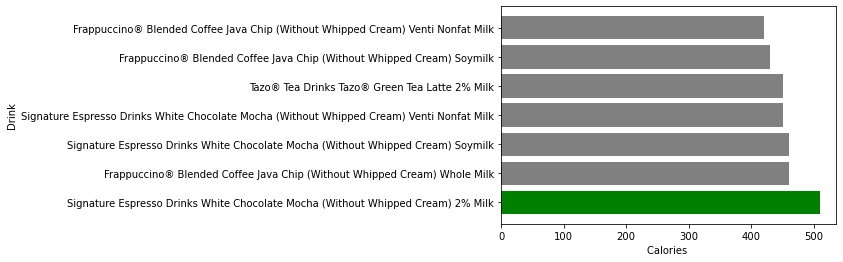

In [28]:
fig,ax=plt.subplots()
ax.barh(Calories['drink'],Calories['Calories'],color=['g', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray'])
ax.set_ylabel("Drink")
ax.set_yticklabels(Calories['drink'])
ax.set_xlabel("Calories ")
plt.show()

## Highest Sugar Drink ?

In [29]:
Sugar=data_orig.sort_values(by='Sugars',ascending=False).head(7)
Sugar

,Beverage_category,Beverage,Beverage_prep,Calories,TotalFat,TotalCarbohydrates,Sugars,Caffeine,drink
214,Frappuccino® Blended Coffee,Java Chip (Without Whipped Cream),Venti Nonfat Milk,420,5,340,84,145.0,Frappuccino® Blended Coffee Java Chip (Without...
215,Frappuccino® Blended Coffee,Java Chip (Without Whipped Cream),Whole Milk,460,10,340,84,145.0,Frappuccino® Blended Coffee Java Chip (Without...
101,Signature Espresso Drinks,Caramel Apple Spice (Without Whipped Cream),Venti,360,0,25,83,0.0,Signature Espresso Drinks Caramel Apple Spice ...
216,Frappuccino® Blended Coffee,Java Chip (Without Whipped Cream),Soymilk,430,8,330,80,145.0,Frappuccino® Blended Coffee Java Chip (Without...
206,Frappuccino® Blended Coffee,Caramel (Without Whipped Cream),Whole Milk,370,5,300,77,130.0,Frappuccino® Blended Coffee Caramel (Without W...
205,Frappuccino® Blended Coffee,Caramel (Without Whipped Cream),Venti Nonfat Milk,330,0.1,290,77,130.0,Frappuccino® Blended Coffee Caramel (Without W...
196,Frappuccino® Blended Coffee,Mocha (Without Whipped Cream),Venti Nonfat Milk,340,1,300,76,140.0,Frappuccino® Blended Coffee Mocha (Without Whi...


C:\Users\Dalia\AppData\Local\Temp/ipykernel_2256/1692262605.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(Sugar['drink'])


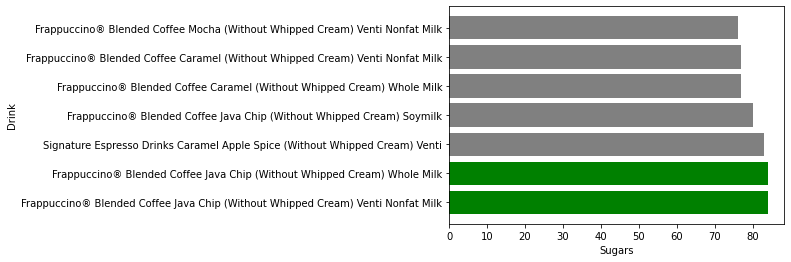

In [30]:
fig,ax=plt.subplots()
ax.barh(Sugar['drink'],Sugar['Sugars'],color=['g', 'g', 'gray', 'gray', 'gray', 'gray', 'gray'])
ax.set_ylabel("Drink")
ax.set_yticklabels(Sugar['drink'])
ax.set_xlabel("Sugars")
plt.show()

## If we have done it By Category

C:\Users\Dalia\AppData\Local\Temp/ipykernel_2256/575619910.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(data_orig['Beverage_category'].unique(),rotation=90)


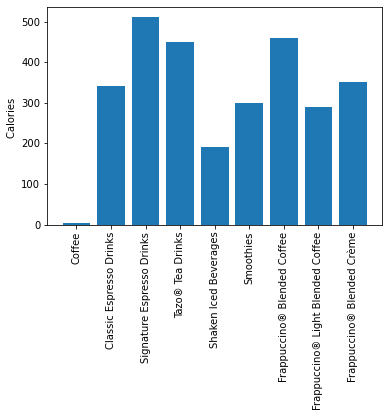

In [31]:
fig,ax=plt.subplots()
ax.bar(data_orig['Beverage_category'],data['Calories'])
#ax.set_xlabel("Drink")
ax.set_xticklabels(data_orig['Beverage_category'].unique(),rotation=90)
ax.set_ylabel("Calories ")
plt.show()

C:\Users\Dalia\AppData\Local\Temp/ipykernel_2256/878373415.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(data_orig['Beverage_category'].unique(),rotation=90)


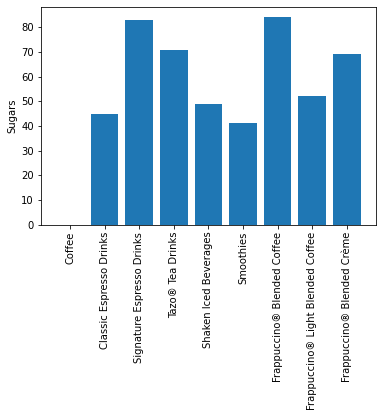

In [32]:
fig,ax=plt.subplots()
ax.bar(data_orig['Beverage_category'],data['Sugars'])
#ax.set_xlabel("Drink")
ax.set_xticklabels(data_orig['Beverage_category'].unique(),rotation=90)
ax.set_ylabel("Sugars")
plt.show()

### We Concluded that Signature Espresso Drinks Has the highest Calories and Frapuccino Light Blended coffee has the highest sugar
### also Coffee has the lowest Calories and Sugars